# Exploring Dandiset 001174: Calcium imaging in SMA and M1 of macaques

**DISCLAIMER:** This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview

This notebook explores Dandiset 001174, which contains calcium imaging data from the supplementary motor area (SMA) and primary motor cortex (M1) of rhesus macaques. The study used miniature microscopes to examine activity patterns of projection neurons in these motor cortices while the animals were at rest or engaged in an arm reaching task.

The researchers implanted gradient index lenses and expressed GCaMP6f to image calcium transients. They tracked neuronal activity, examined cell pairs for synchronous activity, and assessed sequential activation patterns of neurons in SMA and M1.

This dataset is valuable for understanding human motor control in both healthy conditions and movement disorders, demonstrating the utility of in vivo calcium imaging for studying patterns of activity in groups of corticofugal neurons.

## What this notebook covers

In this notebook, we will:

1. Load and explore the metadata of Dandiset 001174
2. Access and examine calcium imaging data from a representative NWB file
3. Visualize raw one-photon calcium imaging data
4. Explore the spatial footprints (ROIs) of identified neurons
5. Analyze fluorescence time series data
6. Examine neural activity patterns and coactivation

The goal is to provide a starting point for researchers interested in analyzing calcium imaging data from non-human primates.

## Required Packages

This notebook requires the following Python packages:

- `dandi`: For accessing the DANDI archive
- `pynwb`: For working with Neurodata Without Borders (NWB) files
- `h5py`: For working with HDF5 files
- `remfile`: For remotely accessing files
- `numpy`: For numerical computations
- `matplotlib`: For plotting
- `seaborn`: For enhanced visualizations
- `pandas`: For data manipulation

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import time
from matplotlib.colors import LinearSegmentedColormap

# Set up plotting
sns.set_theme()
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

## Accessing the Dandiset

We'll start by connecting to the DANDI archive and exploring the Dandiset metadata, including information about the available assets.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001174")

# Get metadata
metadata = dandiset.get_metadata()

# Print basic information about the dandiset
print(f"Dandiset ID: {dandiset.identifier}")
print(f"Dandiset Name: {metadata.name}")
print(f"Description: {metadata.description[:300]}...")

# Get the list of assets
assets = list(dandiset.get_assets())

print(f"\nFound {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path} ({asset.size / 1e6:.1f} MB)")

Dandiset ID: 001174
Dandiset Name: Calcium imaging in SMA and M1 of macaques
Description: The study of motor cortices in non-human primates is relevant to our understanding of human motor control, both in healthy conditions and in movement disorders. Calcium imaging and miniature microscopes allow the study of multiple genetically identified neurons with excellent spatial resolution. We ...

Found 45 assets in the dataset

First 5 assets:
- sub-V/sub-V_ses-20230309T110929_ophys.nwb (10659.7 MB)
- sub-Q/sub-Q_ophys.nwb (790.1 MB)
- sub-Q/sub-Q_ses-20220922T131747_ophys.nwb (787.8 MB)
- sub-Q/sub-Q_ses-20221003T131952_ophys.nwb (1695.9 MB)
- sub-Q/sub-Q_ses-20221028T121142_ophys.nwb (1557.2 MB)


## Selecting and Loading an NWB File

For this demonstration, we'll select the `sub-Q/sub-Q_ophys.nwb` file, which contains calcium imaging data from the supplementary motor area (SMA) during a spontaneous condition. We'll use the remfile package to stream the file from the DANDI archive without downloading it completely.

In [3]:
# Define the URL for the selected NWB file
url = "https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/"

# Open the file using remfile to stream it
print("Opening remote file...")
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)

# Open the NWB file
print("Loading NWB file...")
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print basic metadata about the file
print(f"\nSession Description: {nwb.session_description}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject Species: {nwb.subject.species}")
print(f"Subject Age: {nwb.subject.age}")
print(f"Subject Sex: {nwb.subject.sex}")

Opening remote file...


Loading NWB file...



Session Description: Calcium imaging in SMA during the spontaneous condition
Session Start Time: 2022-09-15 13:16:33.129000+00:00
Subject ID: Q
Subject Species: Macaca mulatta
Subject Age: P5Y
Subject Sex: F


## Exploring the Data Structure

Let's take a closer look at the structure of the NWB file to understand what data is available. We'll examine both the acquisition data (raw imaging data) and the processed optical physiology data.

In [4]:
# Explore the data structure
print("Available acquisition data:")
for name in nwb.acquisition:
    print(f"- {name}")
    
print("\nAvailable processing modules:")
for module_name in nwb.processing:
    print(f"- {module_name}")
    
print("\nData interfaces in ophys module:")
for interface_name in nwb.processing["ophys"].data_interfaces:
    print(f"- {interface_name}")

Available acquisition data:
- OnePhotonSeries

Available processing modules:
- ophys

Data interfaces in ophys module:
- EventAmplitude
- Fluorescence
- ImageSegmentation


## Examining One-Photon Calcium Imaging Data

The acquisition data includes one-photon calcium imaging series. Let's check some basic properties of this data, like its dimensions and sampling rate.

In [5]:
# Get the OnePhotonSeries data
one_photon_series = nwb.acquisition["OnePhotonSeries"]

# Print information about the data
print(f"Data Shape: {one_photon_series.data.shape}")
print(f"Data Type: {one_photon_series.data.dtype}")
print(f"Sampling Rate: {one_photon_series.rate} Hz")
print(f"Unit: {one_photon_series.unit}")
print(f"Description: {one_photon_series.description}")

# Get information about the imaging plane
imaging_plane = one_photon_series.imaging_plane
print(f"\nImaging Plane Description: {imaging_plane.description}")
print(f"Excitation Wavelength: {imaging_plane.excitation_lambda} nm")
print(f"Imaging Rate: {imaging_plane.imaging_rate} Hz")

# Get information about the device
device = imaging_plane.device
print(f"\nDevice Description: {device.description}")
print(f"Device Manufacturer: {device.manufacturer}")

Data Shape: (6041, 320, 200)
Data Type: uint16
Sampling Rate: 10.01 Hz
Unit: fluorescence
Description: Miniscope imaging data

Imaging Plane Description: The plane being imaged by the miniscope
Excitation Wavelength: 475.0 nm
Imaging Rate: 10.01 Hz

Device Description: NVista3
Device Manufacturer: Inscopix, Inc.


## Visualizing Raw Calcium Imaging Data

Let's visualize a few frames of the raw calcium imaging data to see what the microscope captured. We'll select frames from the beginning, middle, and end of the recording.

Time to load frame 0: 0.28 seconds


Time to load frame 1000: 0.43 seconds


Time to load frame 3000: 0.34 seconds


Time to load frame 5999: 0.25 seconds


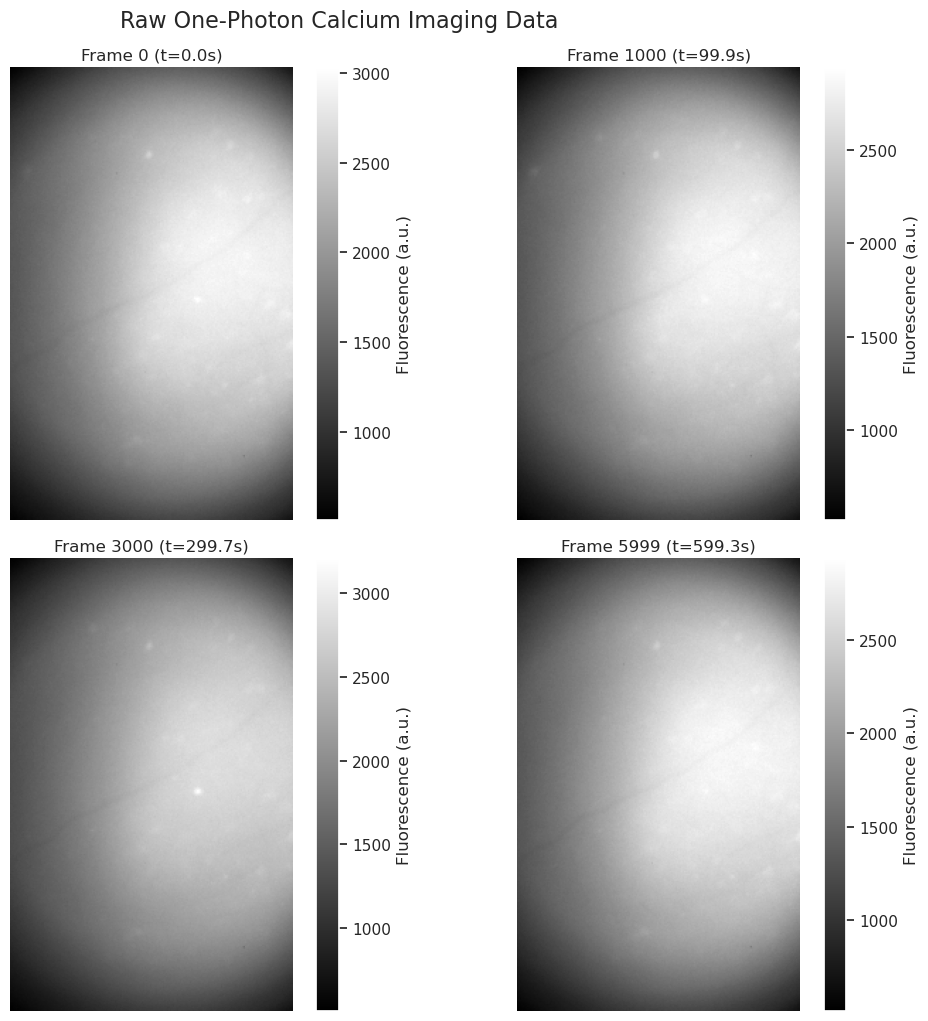

In [6]:
# Define frame indices to display
frame_indices = [0, 1000, 3000, 6000-1]  # First, middle, and last frames

# Create a figure to display the frames
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Load and display each frame
for i, frame_idx in enumerate(frame_indices):
    # Safely access the frame, handling case where the index is out of range
    if frame_idx >= one_photon_series.data.shape[0]:
        frame_idx = one_photon_series.data.shape[0] - 1
    
    # Get the frame data
    t_start = time.time()
    frame = one_photon_series.data[frame_idx, :, :]
    t_end = time.time()
    print(f"Time to load frame {frame_idx}: {t_end - t_start:.2f} seconds")
    
    # Calculate time point in seconds
    time_point = frame_idx / one_photon_series.rate
    
    # Display the frame
    im = axes[i].imshow(frame, cmap='gray')
    axes[i].set_title(f"Frame {frame_idx} (t={time_point:.1f}s)")
    axes[i].axis('off')
    
    # Add a colorbar
    plt.colorbar(im, ax=axes[i], label='Fluorescence (a.u.)', fraction=0.046, pad=0.04)

plt.tight_layout()
plt.suptitle('Raw One-Photon Calcium Imaging Data', y=1.02, fontsize=16)
plt.show()

## Exploring Segmented Neurons (ROIs)

The dataset includes information about the segmented neurons (regions of interest, or ROIs) identified in the calcium imaging data. Let's examine these ROIs and visualize their spatial footprints.

In [7]:
# Access the segmentation data
image_segmentation = nwb.processing["ophys"].data_interfaces["ImageSegmentation"]
plane_segmentation = image_segmentation.plane_segmentations["PlaneSegmentation"]

# Get ROI information
roi_count = len(plane_segmentation.id.data[:])
print(f"Number of ROIs: {roi_count}")

# Convert to dataframe to see what columns are available
roi_df = plane_segmentation.to_dataframe()
print("\nROI DataFrame columns:", roi_df.columns.tolist())
print(f"DataFrame shape: {roi_df.shape}")

Number of ROIs: 40



ROI DataFrame columns: ['image_mask']
DataFrame shape: (40, 1)


Now let's visualize the spatial footprints of all the ROIs (neurons) together to see their distribution in the field of view.

Mask shape: (292, 179)
Loading ROI masks...
Added 40 masks to the visualization


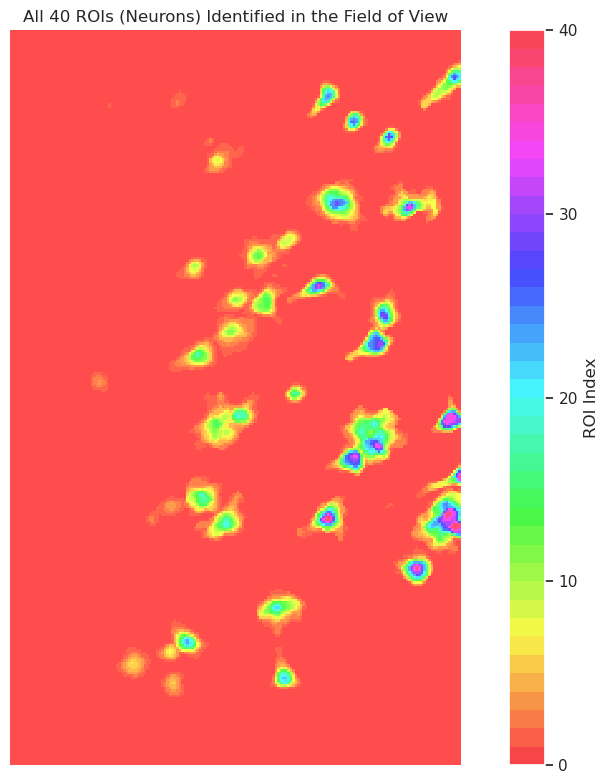

In [8]:
# Create a figure to display the ROI masks
plt.figure(figsize=(10, 8))

# Get the first mask to determine the shape for visualization
first_mask_shape = None
for i in range(roi_count):
    mask = roi_df.iloc[i]['image_mask']
    if mask is not None:
        first_mask_shape = mask.shape
        break

if first_mask_shape is None:
    print("No valid masks found in the dataset")
else:
    print(f"Mask shape: {first_mask_shape}")
    
    # Create a colormap for overlaying multiple ROIs
    colors = plt.cm.hsv(np.linspace(0, 1, roi_count))
    cmap = LinearSegmentedColormap.from_list('roi_cmap', colors, N=roi_count)
    
    # Create a mask combining all ROIs with different colors
    combined_mask = np.zeros(first_mask_shape)
    individual_masks = []
    
    # Collect all individual masks
    print("Loading ROI masks...")
    for i in range(roi_count):
        mask = roi_df.iloc[i]['image_mask']
        if mask is not None and mask.shape == first_mask_shape:  # Only use masks with matching shape
            individual_masks.append(mask)
            # Add this mask to the combined mask with a unique value based on ROI index
            combined_mask = np.maximum(combined_mask, mask * (i + 1))
    
    print(f"Added {len(individual_masks)} masks to the visualization")

# Visualize all ROIs together using a colormap
plt.imshow(combined_mask, cmap=cmap, interpolation='nearest', alpha=0.7)
plt.colorbar(label='ROI Index', ticks=np.linspace(0, roi_count, 5))
plt.title(f'All {roi_count} ROIs (Neurons) Identified in the Field of View')
plt.axis('off')
plt.tight_layout()
plt.show()

Now, let's visualize a few individual ROI masks to better understand the shape of individual neurons.

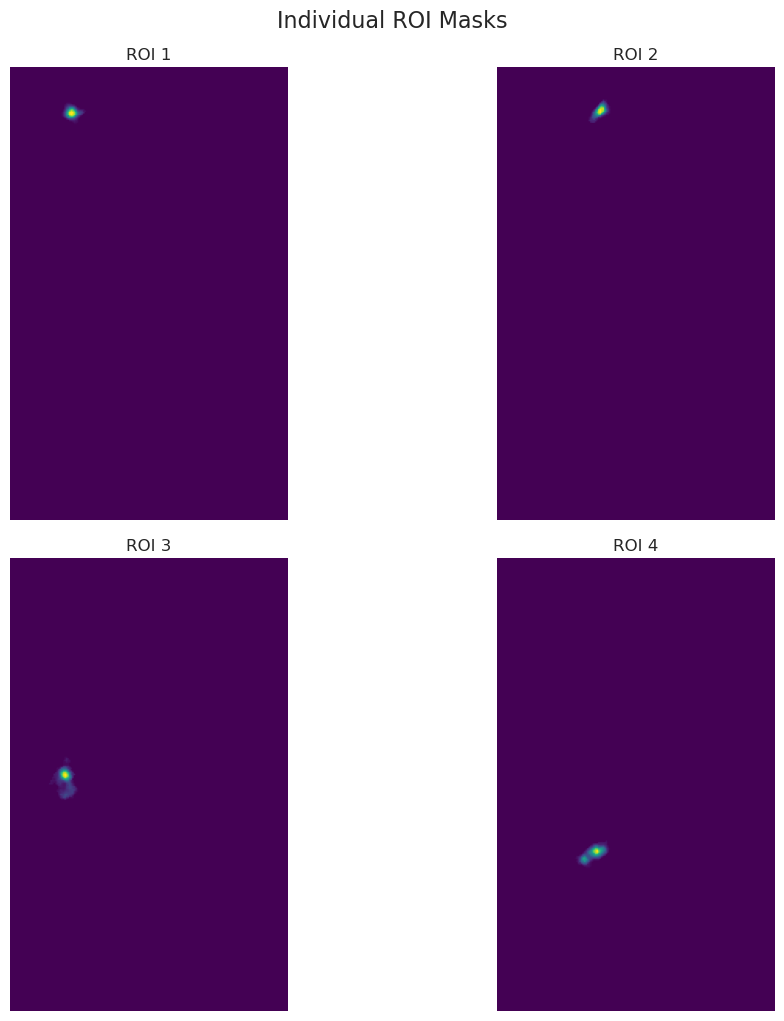

In [9]:
# Select a few ROIs to display (evenly spaced)
selected_indices = np.linspace(0, roi_count-1, 4, dtype=int)

# Create a figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Display individual ROIs
valid_count = 0
for roi_idx in range(roi_count):
    if valid_count >= 4:
        break
        
    mask = roi_df.iloc[roi_idx]['image_mask']
    if mask is not None and (first_mask_shape is None or mask.shape == first_mask_shape):
        axes[valid_count].imshow(mask, cmap='viridis')
        axes[valid_count].set_title(f'ROI {roi_idx+1}')
        axes[valid_count].axis('off')
        valid_count += 1

# If we couldn't find enough valid masks, hide the remaining axes
for i in range(valid_count, 4):
    axes[i].axis('off')
    axes[i].set_title('No valid ROI found')

plt.tight_layout()
plt.suptitle('Individual ROI Masks', y=1.02, fontsize=16)
plt.show()

## Analyzing Fluorescence Time Series

Now let's examine the fluorescence time series data for the identified ROIs. This represents the calcium activity of individual neurons over time.

In [10]:
# Access the fluorescence data
fluorescence = nwb.processing["ophys"].data_interfaces["Fluorescence"]
roi_response_series = fluorescence.roi_response_series["RoiResponseSeries"]

# Print information about the data
print(f"Fluorescence Data Shape: {roi_response_series.data.shape}")
print(f"Number of time points: {roi_response_series.data.shape[0]}")
print(f"Number of ROIs: {roi_response_series.data.shape[1]}")
print(f"Sampling Rate: {roi_response_series.rate} Hz")

# Calculate the total recording time
total_time = roi_response_series.data.shape[0] / roi_response_series.rate
print(f"Total Recording Time: {total_time:.2f} seconds ({total_time/60:.2f} minutes)")

Fluorescence Data Shape: (6041, 40)
Number of time points: 6041
Number of ROIs: 40
Sampling Rate: 10.01 Hz
Total Recording Time: 603.50 seconds (10.06 minutes)


Next, let's plot the fluorescence time series for a few selected neurons to visualize their activity patterns.

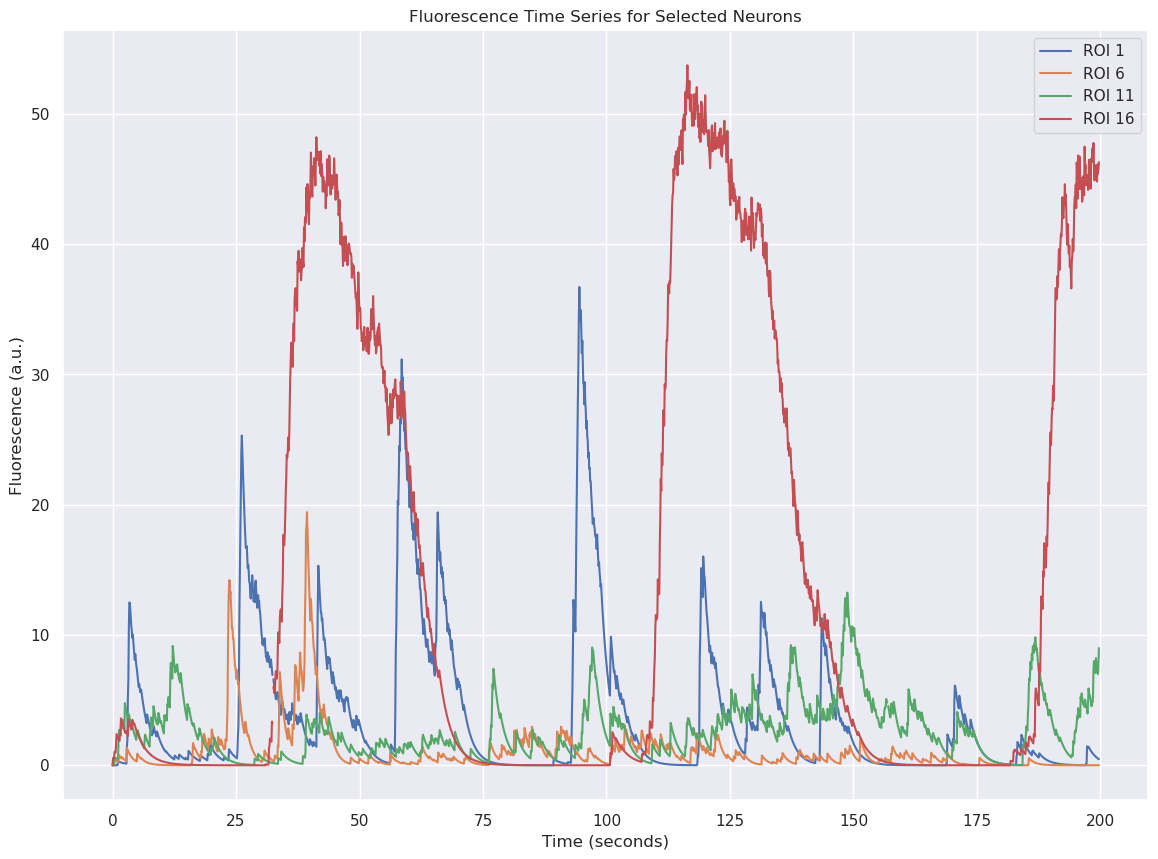

In [11]:
# Select a subset of ROIs to visualize
selected_rois = [0, 5, 10, 15]  # Selecting 4 different ROIs
num_time_points = min(2000, roi_response_series.data.shape[0])  # Limit to first 2000 time points for clarity

# Create a time array
time_array = np.arange(num_time_points) / roi_response_series.rate

# Plot fluorescence time series
plt.figure(figsize=(14, 10))

# Get the data for the selected ROIs and time points
data_subset = roi_response_series.data[:num_time_points, selected_rois]

for i, roi_idx in enumerate(selected_rois):
    plt.plot(time_array, data_subset[:, i], label=f'ROI {roi_idx+1}')

plt.xlabel('Time (seconds)')
plt.ylabel('Fluorescence (a.u.)')
plt.title('Fluorescence Time Series for Selected Neurons')
plt.legend()
plt.grid(True)
plt.show()

Let's also look at the event amplitude data, which represents detected calcium events.

Event Amplitude Data Shape: (6041, 40)
Sampling Rate: 10.013668242678232 Hz


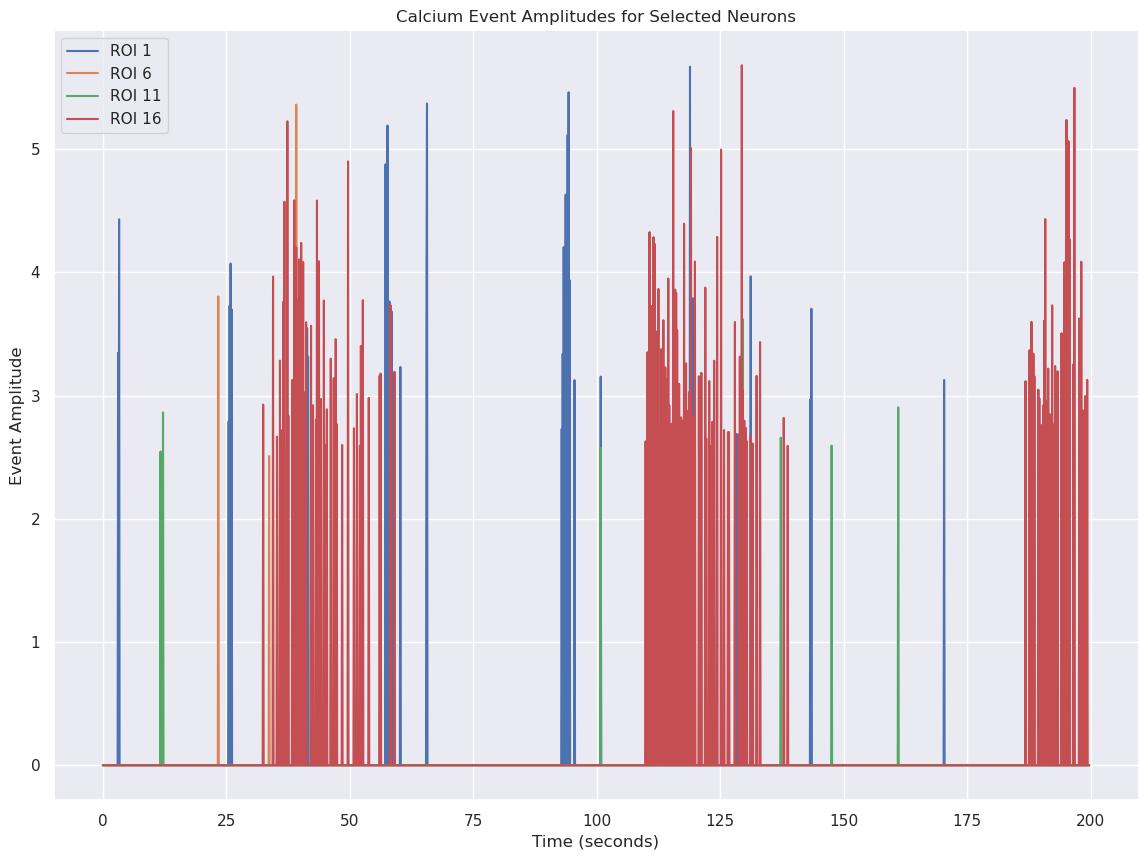

In [12]:
# Access the event amplitude data
event_amplitude = nwb.processing["ophys"].data_interfaces["EventAmplitude"]

# Print information about the data
print(f"Event Amplitude Data Shape: {event_amplitude.data.shape}")
print(f"Sampling Rate: {event_amplitude.rate} Hz")

# Plot event amplitudes for the same ROIs
plt.figure(figsize=(14, 10))

# Get the data for the selected ROIs and time points
event_data_subset = event_amplitude.data[:num_time_points, selected_rois]

for i, roi_idx in enumerate(selected_rois):
    plt.plot(time_array, event_data_subset[:, i], label=f'ROI {roi_idx+1}')

plt.xlabel('Time (seconds)')
plt.ylabel('Event Amplitude')
plt.title('Calcium Event Amplitudes for Selected Neurons')
plt.legend()
plt.grid(True)
plt.show()

## Visualizing Neural Activity Patterns

Let's create a heatmap to visualize the activity of all neurons over time, which can help identify patterns of coordinated activity.

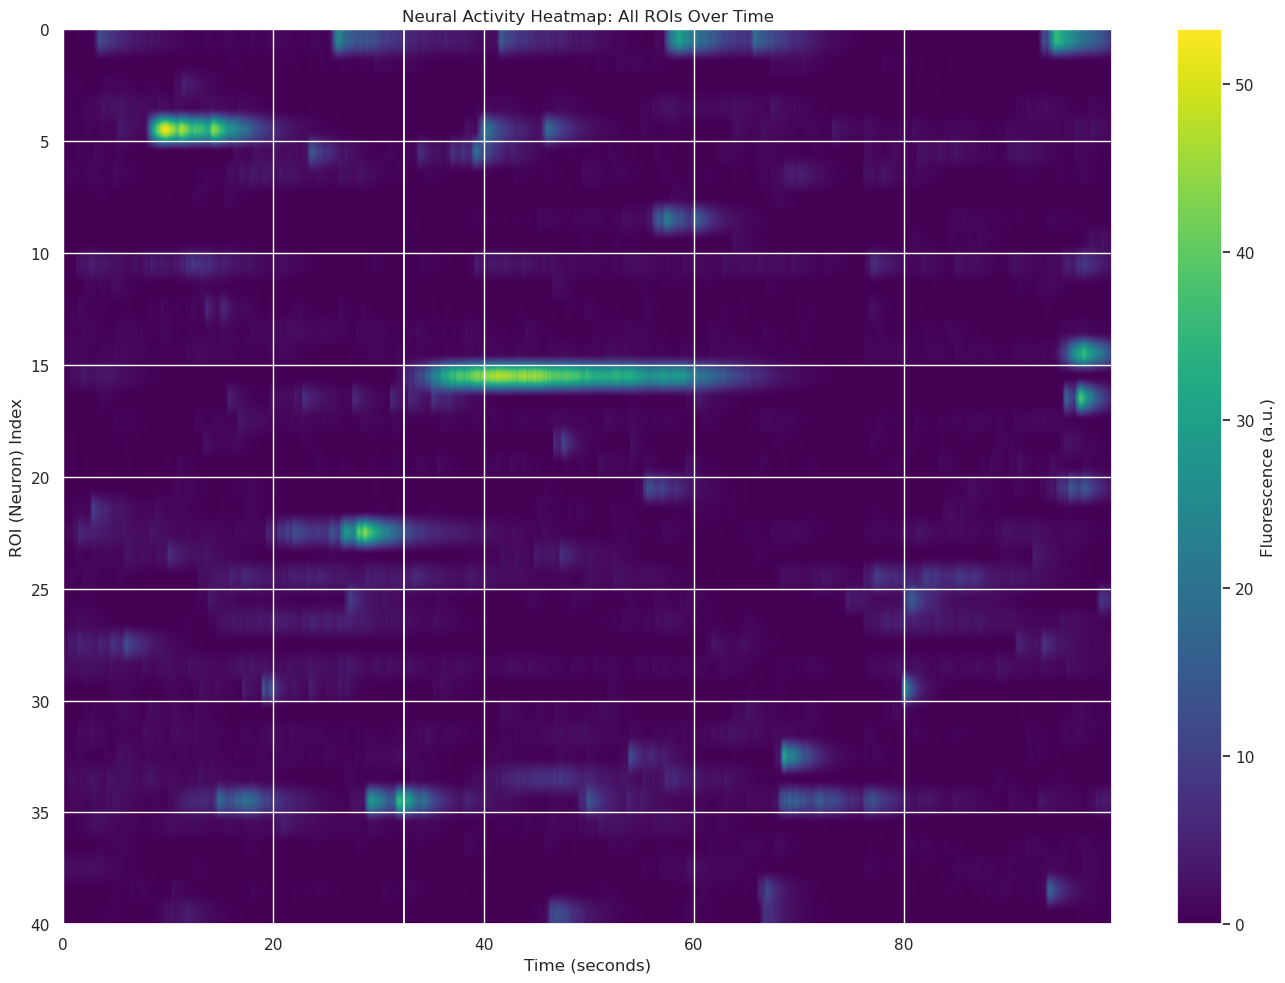

In [13]:
# Create a heatmap of activity across all neurons
# Select a subset of time to make the visualization clearer
time_window = slice(0, 1000)  # First 1000 time points (about 100 seconds)
time_array_window = np.arange(time_window.stop - time_window.start) / roi_response_series.rate

# Get data for all ROIs in the time window
all_roi_data = roi_response_series.data[time_window, :]

# Create the heatmap
plt.figure(figsize=(14, 10))
im = plt.imshow(all_roi_data.T, aspect='auto', cmap='viridis', 
                extent=[0, time_array_window[-1], all_roi_data.shape[1], 0])
plt.colorbar(label='Fluorescence (a.u.)')
plt.xlabel('Time (seconds)')
plt.ylabel('ROI (Neuron) Index')
plt.title('Neural Activity Heatmap: All ROIs Over Time')
plt.tight_layout()
plt.show()

## Analyzing Neuronal Coactivation

Let's analyze the correlation between neurons to identify potential functional relationships.

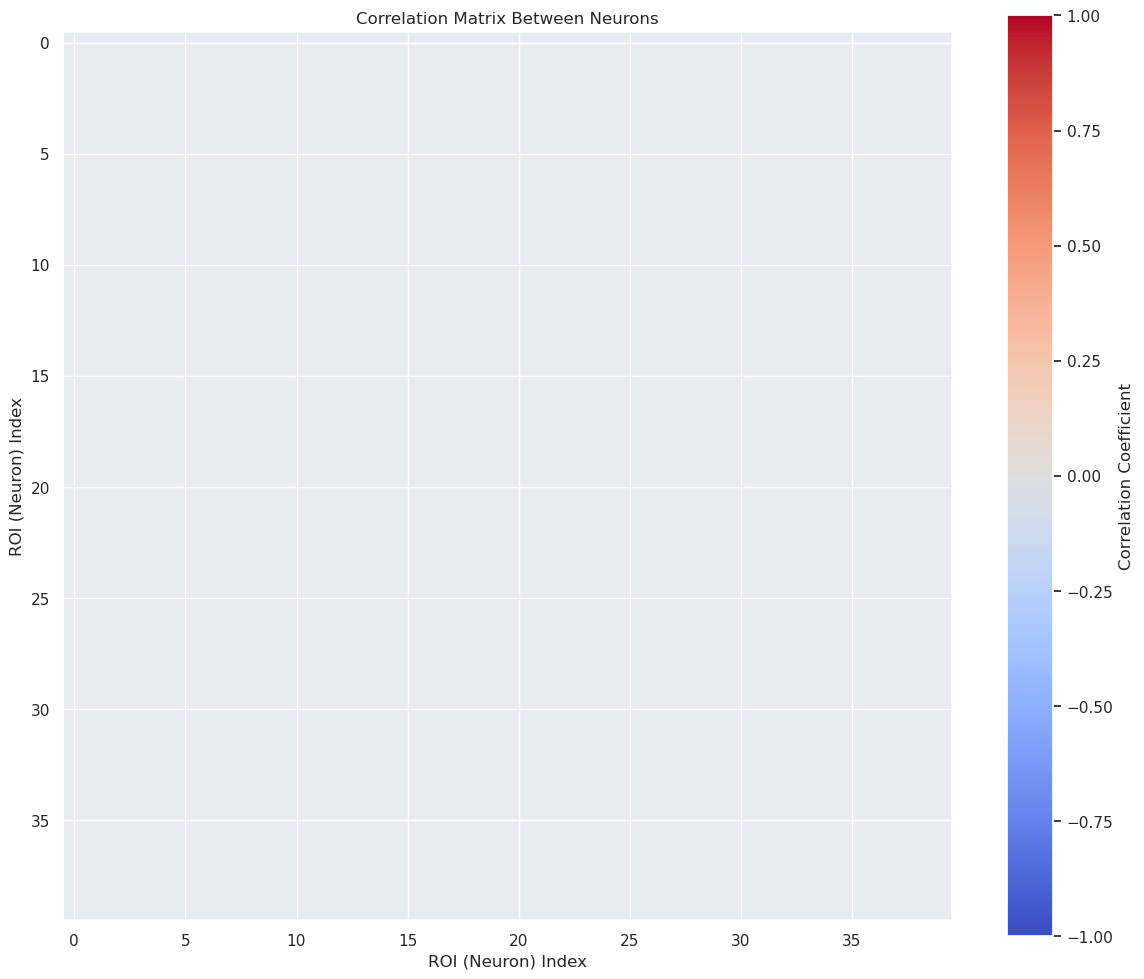

In [14]:
# Compute correlation matrix between neurons
correlation_matrix = np.corrcoef(all_roi_data.T)

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
im = plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(im, label='Correlation Coefficient')
plt.title('Correlation Matrix Between Neurons')
plt.xlabel('ROI (Neuron) Index')
plt.ylabel('ROI (Neuron) Index')
plt.tight_layout()
plt.show()

Let's identify some highly correlated pairs of neurons and plot their activity together.

Most correlated pair of neurons: ROI 1 and ROI 2
Correlation coefficient: nan
Most anti-correlated pair of neurons: ROI 1 and ROI 2
Correlation coefficient: nan


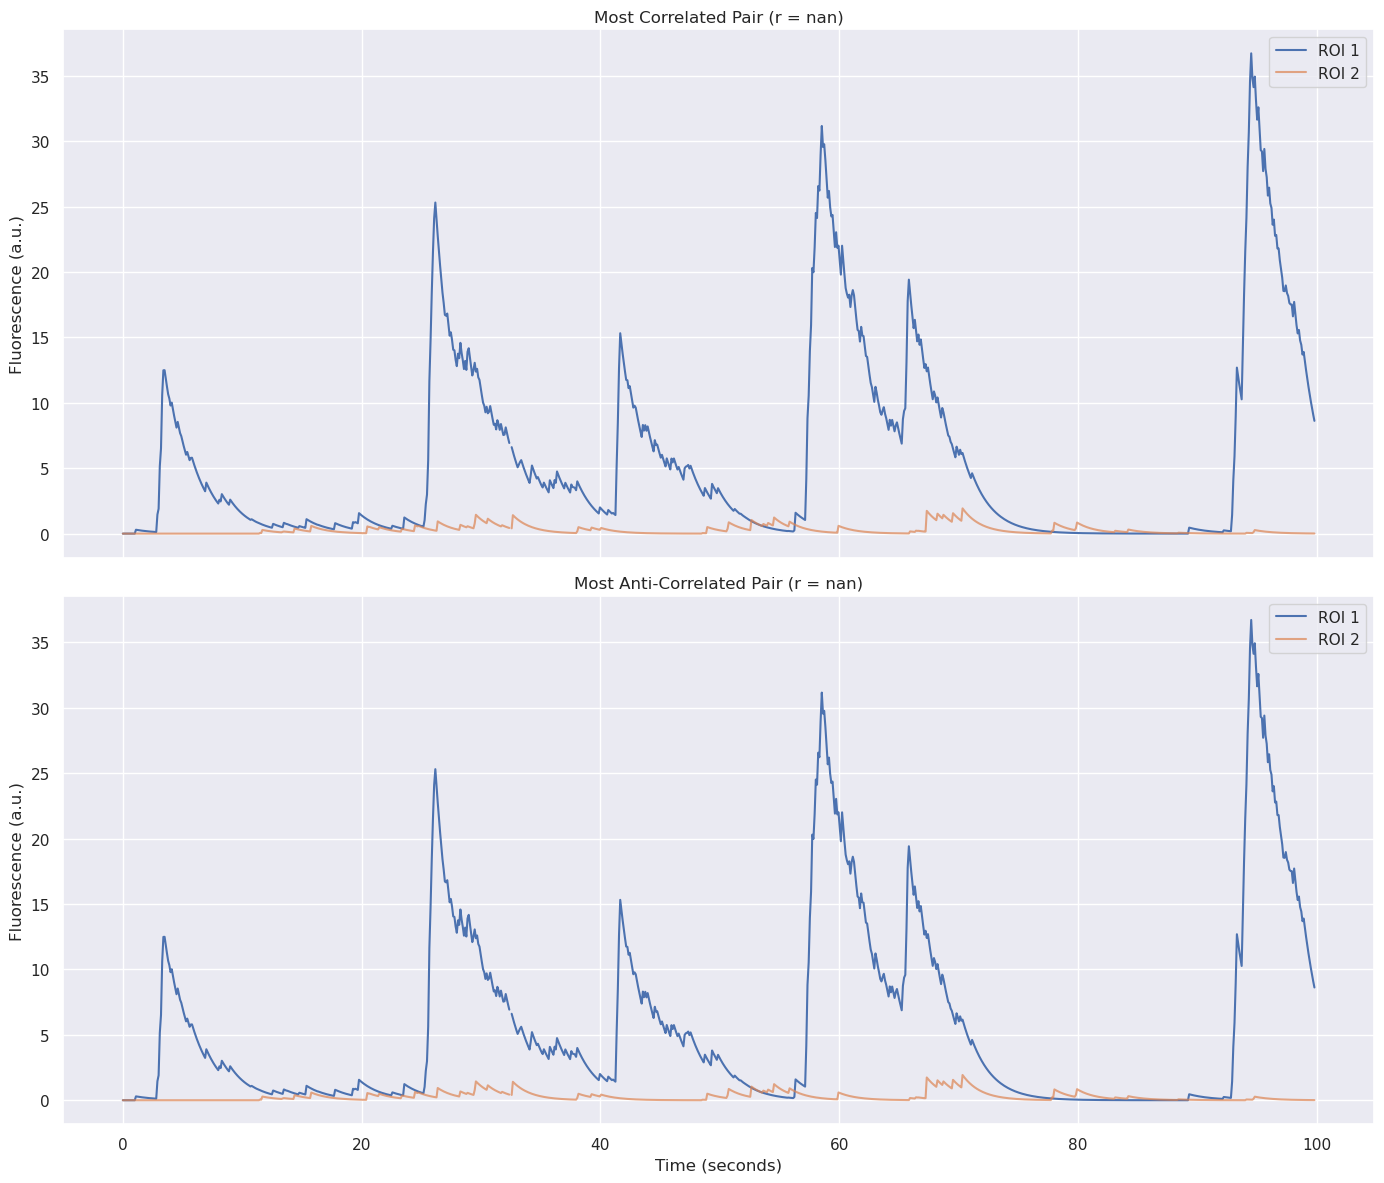

In [15]:
# Find the most correlated pair of neurons (excluding self-correlations)
np.fill_diagonal(correlation_matrix, 0)  # Set diagonal to 0 to exclude self-correlations
max_corr_idx = np.unravel_index(np.argmax(correlation_matrix), correlation_matrix.shape)
max_corr_value = correlation_matrix[max_corr_idx]

print(f"Most correlated pair of neurons: ROI {max_corr_idx[0]+1} and ROI {max_corr_idx[1]+1}")
print(f"Correlation coefficient: {max_corr_value:.3f}")

# Find the most anti-correlated pair
min_corr_idx = np.unravel_index(np.argmin(correlation_matrix), correlation_matrix.shape)
min_corr_value = correlation_matrix[min_corr_idx]

print(f"Most anti-correlated pair of neurons: ROI {min_corr_idx[0]+1} and ROI {min_corr_idx[1]+1}")
print(f"Correlation coefficient: {min_corr_value:.3f}")

# Plot the activity of these pairs
fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# Plot the most correlated pair
axes[0].plot(time_array_window, all_roi_data[:, max_corr_idx[0]], label=f'ROI {max_corr_idx[0]+1}')
axes[0].plot(time_array_window, all_roi_data[:, max_corr_idx[1]], label=f'ROI {max_corr_idx[1]+1}', alpha=0.7)
axes[0].set_title(f'Most Correlated Pair (r = {max_corr_value:.3f})')
axes[0].set_ylabel('Fluorescence (a.u.)')
axes[0].legend()
axes[0].grid(True)

# Plot the most anti-correlated pair
axes[1].plot(time_array_window, all_roi_data[:, min_corr_idx[0]], label=f'ROI {min_corr_idx[0]+1}')
axes[1].plot(time_array_window, all_roi_data[:, min_corr_idx[1]], label=f'ROI {min_corr_idx[1]+1}', alpha=0.7)
axes[1].set_title(f'Most Anti-Correlated Pair (r = {min_corr_value:.3f})')
axes[1].set_xlabel('Time (seconds)')
axes[1].set_ylabel('Fluorescence (a.u.)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Advanced Visualization: Combining Spatial and Temporal Information

Now, let's create a more advanced visualization that combines information about both the spatial location and temporal activity of neurons.

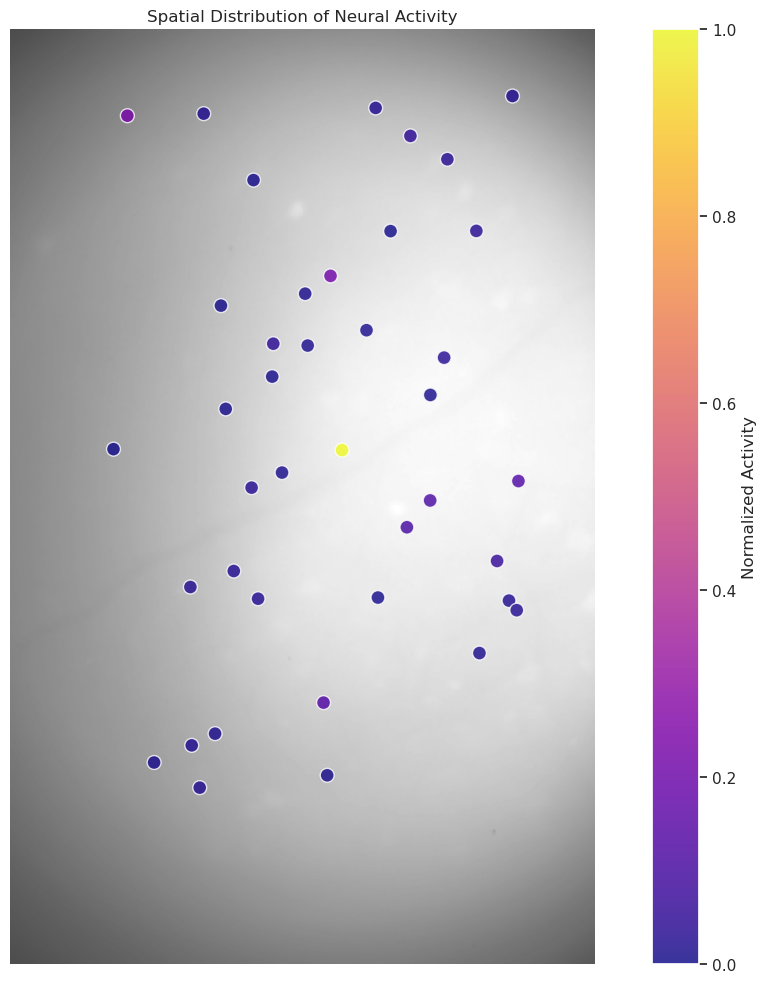

In [16]:
# Get the centroids of each ROI
def calculate_centroid(mask):
    """Calculate the centroid of a 2D binary mask."""
    if mask is None or np.sum(mask) == 0:
        return (0, 0)
    
    y_indices, x_indices = np.where(mask > 0)
    centroid_y = np.mean(y_indices)
    centroid_x = np.mean(x_indices)
    return (centroid_y, centroid_x)

# Calculate centroids for all ROIs that have valid masks matching our expected shape
centroids = []
roi_indices = []
for i in range(roi_count):
    mask = roi_df.iloc[i]['image_mask']
    if mask is not None and (first_mask_shape is None or mask.shape == first_mask_shape):
        centroids.append(calculate_centroid(mask))
        roi_indices.append(i)

centroids = np.array(centroids) if centroids else np.array([[0, 0]])

# Create a background image using the average of the first few frames
avg_frame = np.mean(one_photon_series.data[:10, :, :], axis=0)

# Calculate the average activity of each ROI within a specific time window
time_window_activity = slice(500, 600)  # Example: 10 seconds around t=50s

if len(roi_indices) > 0:
    # Calculate average activity only for ROIs with valid centroids
    avg_activity = np.mean(roi_response_series.data[time_window_activity, roi_indices], axis=0)
    
    # Normalize for better visualization
    if len(avg_activity) > 0 and np.max(avg_activity) > np.min(avg_activity):
        normalized_activity = (avg_activity - np.min(avg_activity)) / (np.max(avg_activity) - np.min(avg_activity))
    else:
        normalized_activity = np.zeros(len(avg_activity))
    
    # Plot ROI locations on the background image, with color representing activity level
    plt.figure(figsize=(12, 10))
    plt.imshow(avg_frame, cmap='gray', alpha=0.7)
    
    # Add scatter plot with ROI centroids
    if len(centroids) > 0 and centroids.shape[1] == 2:
        scatter = plt.scatter(centroids[:, 1], centroids[:, 0], 
                            c=normalized_activity, cmap='plasma', 
                            s=100, alpha=0.8, edgecolors='w')
    else:
        print("No valid centroids found for visualization")
else:
    print("No valid ROIs found for spatial visualization")

plt.colorbar(scatter, label='Normalized Activity')
plt.title('Spatial Distribution of Neural Activity')
plt.axis('off')
plt.tight_layout()
plt.show()

## Summary

In this notebook, we explored Dandiset 001174, which contains calcium imaging data from the supplementary motor area (SMA) and primary motor cortex (M1) of macaques. We were able to:

1. Load and examine the metadata of a calcium imaging NWB file
2. Visualize raw one-photon calcium imaging data
3. Explore the spatial footprints (ROIs) of identified neurons
4. Analyze fluorescence time series data for individual neurons
5. Create a heatmap visualization of neural activity across all ROIs
6. Analyze correlations between neurons to identify functionally related pairs
7. Combine spatial and temporal information to visualize activity patterns

These analyses demonstrate the rich information available in calcium imaging datasets for studying neuronal activity patterns. This dataset specifically offers insights into the function of motor cortical areas in non-human primates, which is relevant to our understanding of human motor control in both healthy conditions and movement disorders.

## Future Directions

For further analysis of this dataset, researchers might consider:

1. Relating neuronal activity to specific behavioral events or task conditions
2. Clustering neurons based on activity patterns to identify functional cell types
3. Comparing activity patterns between SMA and M1 regions
4. Analyzing sequential activation patterns of neurons during motor tasks
5. Applying dimensionality reduction techniques like PCA or t-SNE to identify low-dimensional manifolds of neural activity
6. Developing predictive models to relate neural activity to motor output

The methods demonstrated in this notebook can be extended to all NWB files in the dataset for more comprehensive analyses.